In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
%%html
<style type ="text/css">
table.dataframe th,table.dataframe td
{
    border:1px;
    border-style:solid;
}

### Dataset1: Stanford open policing project

In [4]:
ri = pd.read_csv('./data/police.csv')

In [5]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
ri.shape

(91741, 15)

In [7]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [8]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [9]:
ri.isnull()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91737,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91738,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
91739,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


### 1.Remove the column that only contains missing values

In [10]:
ri.drop(['county_name'],axis='columns',inplace=True)

In [11]:
ri.shape

(91741, 14)

In [12]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [13]:
ri.dropna(axis='columns',how='all').shape

(91741, 14)

## 2.Do men or women speed more often?

### driver_gender,violation


In [14]:
ri[ri['violation'] =='Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [15]:
ri[ri['violation'] =='Speeding'].driver_gender.value_counts(normalize =True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [16]:
#when a men is pulled over how often full speeding 
#when a women is pulled over how often full speeding 
ri[ri['driver_gender'] == 'M'].violation.value_counts(normalize =True)


Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [17]:
ri[ri['driver_gender'] == 'F'].violation.value_counts(normalize =True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [18]:
ri.groupby('driver_gender').violation.value_counts(normalize =True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [19]:
ri.groupby('driver_gender').violation.value_counts(normalize =True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [20]:
ri.groupby('driver_gender').violation.value_counts(normalize =True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


## 3.Does gender affect who gets searched during a stop

### driver_gender,search_conducted

In [21]:
ri['search_conducted'].value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [22]:
ri['search_conducted'].mean()

0.03483720473942948

In [23]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [24]:
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

## 4.Why is search_type missing so often

In [25]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [26]:
ri['search_conducted'].value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [27]:
ri['search_type'].value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Incident t

In [28]:
ri[ri['search_conducted'] == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

## 5.During a search,how often is the driver frisked?

In [29]:
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk')

In [30]:
ri['frisk'].value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [31]:
ri['frisk'].sum()

274

In [32]:
ri['frisk'].mean()

0.08573216520650813

In [33]:
274/(274 +2922)

0.08573216520650813

### 6.Which year had the least number of stops?

In [34]:
ri.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [35]:
ri.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
frisk                  object
dtype: object

In [36]:
ri['stop_date'].str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [37]:
pd.to_datetime(ri['stop_date'])

0       2005-01-02
1       2005-01-18
2       2005-01-23
3       2005-02-20
4       2005-03-14
           ...    
91736   2015-12-31
91737   2015-12-31
91738   2015-12-31
91739   2015-12-31
91740   2015-12-31
Name: stop_date, Length: 91741, dtype: datetime64[ns]

In [38]:
##Another way to do
combined = ri['stop_date'].str.cat(ri['stop_time'] ,sep =' ')
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

pd.to_datetime(combined)

In [39]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [40]:
ri['stop_datetime'] 

0       2005-01-02 01:55:00
1       2005-01-18 08:15:00
2       2005-01-23 23:15:00
3       2005-02-20 17:15:00
4       2005-03-14 10:00:00
                ...        
91736   2015-12-31 20:27:00
91737   2015-12-31 20:35:00
91738   2015-12-31 20:45:00
91739   2015-12-31 21:42:00
91740   2015-12-31 22:46:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [41]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [42]:
##Date time has dt 
ri['stop_datetime'].dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [43]:
ri['stop_datetime'].dt.year.value_counts().sort_values().index[0]

2005

In [44]:
ri['stop_datetime'].dt.weekday

0        6
1        1
2        6
3        6
4        0
        ..
91736    3
91737    3
91738    3
91739    3
91740    3
Name: stop_datetime, Length: 91741, dtype: int64

## 7.How does drug activity change by  time of day?

### stop_datetime,drugs_related_Stop

In [45]:
ri['drugs_related_stop'].dtype

dtype('bool')

In [46]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


In [47]:
ri['drugs_related_stop'].mean()

0.008883705213590434

In [48]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [49]:
#Actually i want this but hour is not there
# ri.groupby('hour').drugs_related_stop.mean()

In [50]:
##Actually i done this one
ri['hour'] = ri['stop_datetime'].dt.hour

In [51]:
####Actually i done this one
 
ri['hour'] 

0         1
1         8
2        23
3        17
4        10
         ..
91736    20
91737    20
91738    20
91739    21
91740    22
Name: hour, Length: 91741, dtype: int64

In [52]:
##Actually i done this one

ri.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,hour
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,1


In [53]:
##Actually i done this one

ri.groupby('hour').drugs_related_stop.mean()

hour
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

In [54]:
##Data School guy kevin do like this

ri.groupby(ri['stop_datetime'].dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

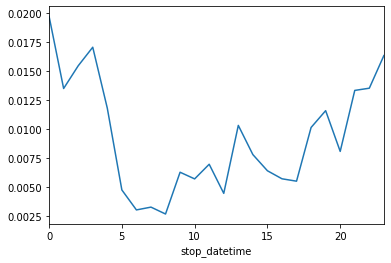

In [55]:
ri.groupby(ri['stop_datetime'].dt.hour).drugs_related_stop.mean().plot()

## 8.Do most stops occur at night?

In [56]:
ri['stop_datetime'].dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

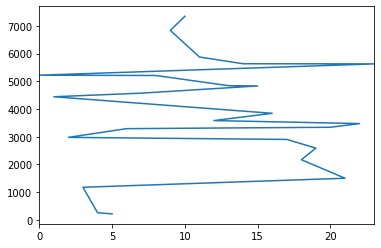

In [57]:
##In series sort_index and sort_values are two methods
ri['stop_datetime'].dt.hour.value_counts().plot()

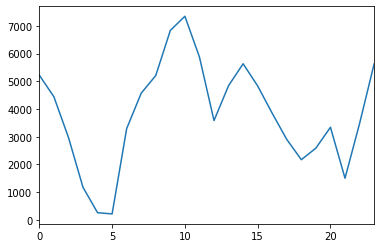

In [58]:
ri['stop_datetime'].dt.hour.value_counts().sort_index().plot()

In [59]:
##data school do this one
ri[(ri['stop_datetime'].dt.hour > 4 ) & (ri['stop_datetime'].dt.hour < 22)]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,hour
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,17
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,10
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-23 09:45:00,9
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-04-01 17:30:00,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 20:25:00,20
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00,20
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00,20
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00,20


In [60]:
ri[(ri['stop_datetime'].dt.hour > 4 ) & (ri['stop_datetime'].dt.hour < 22)].shape

(68575, 17)

In [61]:
ri.shape

(91741, 17)

In [62]:
ri[(ri['stop_datetime'].dt.hour > 18 ) | (ri['stop_datetime'].dt.hour < 4)]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,hour
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,1
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,23
11,2005-07-13,19:00,F,1966.0,39.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-07-13 19:00:00,19
12,2005-07-14,19:55,M,1979.0,26.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-07-14 19:55:00,19
13,2005-07-18,19:30,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-07-18 19:30:00,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00,20
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00,20
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00,20
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00,21


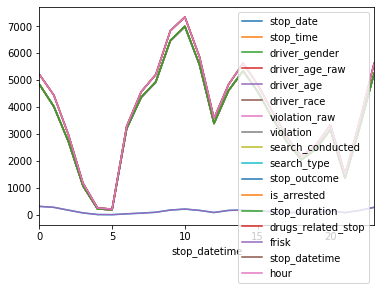

In [63]:
ri.groupby(ri['stop_datetime'].dt.hour).count().plot()

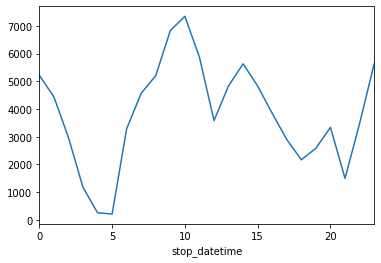

In [64]:
ri.groupby(ri['stop_datetime'].dt.hour).stop_date.count().plot()

## 9.find the bad data in the stop_duration column and fix it

In [65]:
ri.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,hour
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,1
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8


In [66]:
ri['stop_duration'].value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [67]:
ri['stop_duration'].value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [73]:
ri[(ri['stop_duration'] == '1' ) | (ri['stop_duration'] == '2')].stop_duration ='NaN'

C:\Users\Venu1234\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [71]:
ri['stop_duration'].dtype

dtype('O')

In [74]:
ri['stop_duration'].value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [75]:
ri.loc[(ri['stop_duration'] == '1' ) | (ri['stop_duration'] == '2'),'stop_duration'] ='NaN'

In [76]:
ri['stop_duration'].value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [77]:
ri['stop_duration'].value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [78]:
import numpy as np

In [79]:
ri.loc[ri['stop_duration'] == 'NaN','stop_duration'] = np.nan

In [81]:
ri['stop_duration'].value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64